# CNN LeNet 5

## Loading and preprocessing the data

In [55]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [56]:
mnist = tf.keras.datasets.mnist

(X_train_, y_train), (X_test_, y_test) = mnist.load_data()
X_train_, X_test_ = X_train_.astype(np.float32) / 255.0, X_test_.astype(np.float32)/ 255.0

In [57]:
# Add another dimension
X_train = X_train_[..., np.newaxis]
X_test = X_test_[..., np.newaxis]
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [58]:
# Reduce dimension size
np.random.seed(0) 

REDUCE_DIM = 2000
idx = np.random.permutation(REDUCE_DIM)

X_train = X_train[idx]
y_train = y_train[idx]
X_test = X_test[idx]
y_test = y_test[idx]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 28, 28, 1)
(2000, 28, 28, 1)
(2000,)
(2000,)


## Resize image to 32x32

In [59]:
image_size=[32, 32]

X_train_resize = tf.image.resize(
    X_train, size=image_size, method=tf.image.ResizeMethod.BICUBIC, preserve_aspect_ratio=False,
    antialias=False, name=None
).numpy()

X_test_resize = tf.image.resize(
    X_test, size=image_size, method=tf.image.ResizeMethod.BICUBIC, preserve_aspect_ratio=False,
    antialias=False, name=None
).numpy()

print(X_train_resize.shape)
print(X_test_resize.shape)

(2000, 32, 32, 1)
(2000, 32, 32, 1)


## Model building

In [60]:
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(32,32,1)))

model.add(tf.keras.layers.Conv2D(
    filters=6, kernel_size=(5, 5), strides=(1, 1), padding='valid',
    data_format='channels_last', name='C1', activation='tanh'))

model.add(tf.keras.layers.AveragePooling2D(
    pool_size=(2,2), strides=None, name='S2'))

model.add(tf.keras.layers.Conv2D(
    filters=16, kernel_size=(5, 5), strides=(1, 1), padding='valid',
    name='C3', activation='tanh')
)

model.add(tf.keras.layers.AveragePooling2D(
    pool_size=(2,2), strides=None, name='S4'))

model.add(tf.keras.layers.Conv2D(
    filters=120, kernel_size=(5, 5), strides=(1, 1), padding='valid',
    name='C5', activation='tanh')
)

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(84, name='F6', activation='tanh'))

model.add(tf.keras.layers.Dense(10, name='Out', activation='softmax') )

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 28, 28, 6)         156       
_________________________________________________________________
S2 (AveragePooling2D)        (None, 14, 14, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 10, 10, 16)        2416      
_________________________________________________________________
S4 (AveragePooling2D)        (None, 5, 5, 16)          0         
_________________________________________________________________
C5 (Conv2D)                  (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
F6 (Dense)                   (None, 84)                1

In [62]:
model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

In [63]:
history = model.fit(X_train_resize, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
57/57 [==============================] - 0s 7ms/step - loss: 1.0769 - accuracy: 0.6917 - val_loss: 0.5386 - val_accuracy: 0.8600
Epoch 2/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4261 - accuracy: 0.8850 - val_loss: 0.4074 - val_accuracy: 0.8950
Epoch 3/20
57/57 [==============================] - 0s 5ms/step - loss: 0.3330 - accuracy: 0.9028 - val_loss: 0.3579 - val_accuracy: 0.8850
Epoch 4/20
57/57 [==============================] - 0s 5ms/step - loss: 0.2759 - accuracy: 0.9211 - val_loss: 0.3030 - val_accuracy: 0.9250
Epoch 5/20
57/57 [==============================] - 0s 5ms/step - loss: 0.2237 - accuracy: 0.9389 - val_loss: 0.3160 - val_accuracy: 0.9200
Epoch 6/20
57/57 [==============================] - 0s 5ms/step - loss: 0.1897 - accuracy: 0.9472 - val_loss: 0.3291 - val_accuracy: 0.9150
Epoch 7/20
57/57 [==============================] - 0s 5ms/step - loss: 0.1579 - accuracy: 0.9528 - val_loss: 0.3123 - val_accuracy: 0.9150
Epoch 8/20
57/57 [==

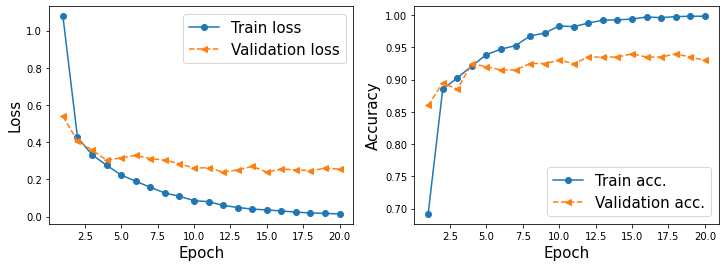

In [64]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/15_12.png', dpi=300)
plt.show()

In [65]:
test_results = model.evaluate(X_test_resize, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

63/63 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.9115

Test Acc. 91.15%


In [66]:
# Find misclassification
y_pred_tf = model(X_test_resize)
y_pred_tf.numpy().shape

y_pred = tf.math.argmax(y_pred_tf,axis=1).numpy()
print(y_pred.shape)
print(y_test.shape)

loc = y_pred != y_test
print(f'Missclassification = {loc.sum()}')

(2000,)
(2000,)
Missclassification = 177


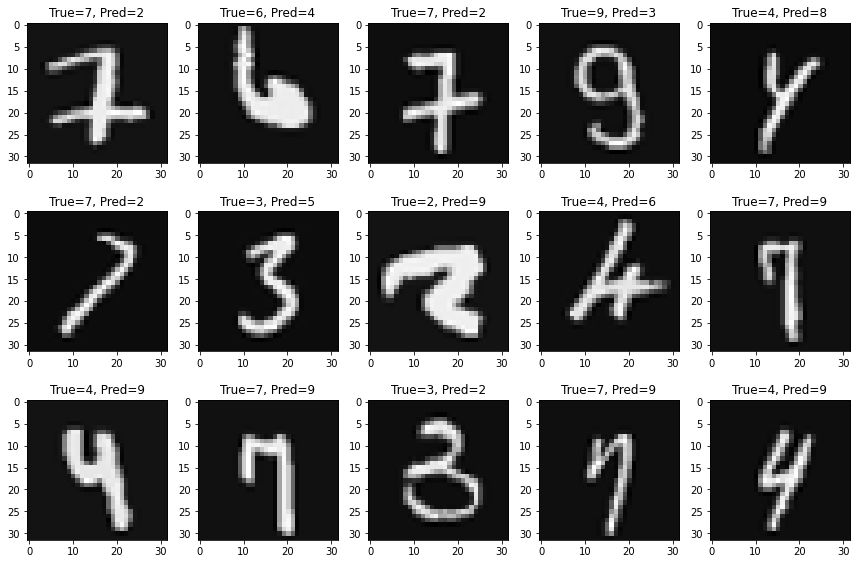

In [67]:
fig, axes2D = plt.subplots(3,5, figsize=(12,8))
axes = list(itertools.chain.from_iterable(axes2D)) # Flatten 2D list
X_test_miss = X_test_resize[loc]
y_test_miss = y_test[loc]
y_pred_miss = y_pred[loc]
for idx, ax in enumerate(axes):
    ax.imshow(X_test_miss[idx], cmap='gray')
    ax.set_title(f'True={y_test_miss[idx]}, Pred={y_pred_miss[idx]}')
fig.tight_layout()
plt.show()